### Lab: Quantum Random Number Generation with Hadamard Gates

This lab demonstrates how to implement a simple quantum random number generator (QRNG) using Qiskit. Each qubit is initialized in a superposition state using Hadamard gates and then measured to produce a random bitstring. The bitstrings are collected from the simulator and converted into integers, effectively generating random numbers.

The output mimics quantum randomness and shows how measurements collapse qubit states to classical values. This basic setup provides a foundation for exploring randomness in quantum systems.

---

### Task

1. **Run the provided code** and observe the generated bitstrings and their integer equivalents.
2. **Change the number of qubits** (`n_qubits`) and see how the range of generated numbers increases.
3. **Repeat the experiment** with a larger number of shots (e.g., 100 or 1000) and analyze the distribution of the results.
4. **Optional Challenge**:  
   - Modify the code to plot a histogram of the generated integers.  
   - Try applying other single-qubit gates (e.g., `RY`, `RX`) instead of `Hadamard` and compare the effect on randomness.

---

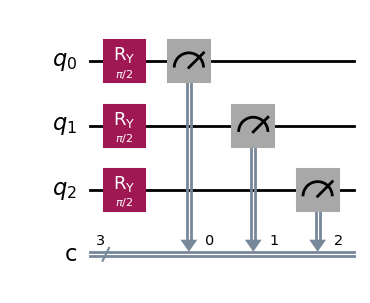

[0, 1, 7, 7, 1, 2, 3, 6, 5, 7]


In [4]:
from IPython.display import display

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer

def qrng(n):
    """
    Generates a quantum circuit for an n-bit quantum random number generator.  
    Each qubit is placed in superposition using a Hadamard gate and then measured.
    Returns a QuantumCircuit object.
    """
    qc = QuantumCircuit(n, n)
    
    for i in range(n):
        qc.h(i)
    qc.measure(range(n), range(n))
    
    return qc
        
# ------------------------------------------------
#                main program
# ------------------------------------------------
# --  setup simulator ---
simulator = AerSimulator()

# -- number of qubits --
n_qubits = 3
shots = 10

# -- run the circuit --
qc = qrng(n_qubits)
result = simulator.run(qc,shots = shots, memory=True).result()

# -- get raw bitstring samples from each simulator shot --
rnd_numbers = result.get_memory()

# -- convert to integers --
integers = [int(b, 2) for b in rnd_numbers]

# -- print result --
circuit_plot = circuit_drawer(qc, output="mpl")
display(circuit_plot)
print (integers)